Name: **Shubham Patil**<br>
Assignment 2: **Implementing Feedforward neural networks with Keras and TensorFlow**



In [1]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.20.3 in c:\users\shubham\anaconda3\lib\site-packages (from tensorflow-intel==2.14.0->tensorflow) (4.24.4)



#  A. Importing necessary libraries


In [1]:
# Import TensorFlow library
import tensorflow as tf

 # Import Keras, a high-level neural networks API
from tensorflow import keras

# Import Pandas for data manipulation and analysis
import pandas as pd

# Import NumPy for numerical operations
import numpy as np

# Import Matplotlib for plotting
import matplotlib.pyplot as plt

# Import random module for generating random numbers
import random

# Enable inline plotting for Jupyter Notebook
%matplotlib inline

C:\Users\SHUBHAM\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# B. Load the training and testing data (MNIST dataset)

We load the MNIST dataset, which is a popular dataset for digit recognition.


In [2]:
 # Load the MNIST dataset
mnist = tf.keras.datasets.mnist 

# Split the dataset into training and testing data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

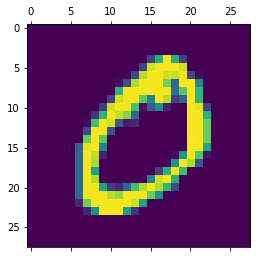

In [3]:
# displays a matrix plot of a sample image from the training dataset
plt.matshow(x_train[1])

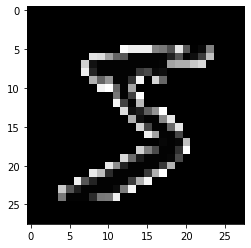

In [4]:
# Display grayscale image with inverted colors using cmap "gray."
plt.imshow(-x_train[0], cmap="gray")

In [5]:
# Normalizing helps in avoiding numerical instability during training.
x_train = x_train / 255 # We divide by 255 to normalize the pixel values.
x_test = x_test / 255

# C. Define the network architecture using Keras

Define a simple feedforward neural network using Keras.


In [6]:
# # Create a sequential model
model = keras.Sequential([
keras.layers.Flatten(input_shape=(28, 28)), # Flatten the input images 
keras.layers.Dense(128, activation="relu"), # Add a dense layer with 128 units and ReLU activation
keras.layers.Dense(10, activation="softmax")# Add the output layer with 10 units for digit classification
])


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# D. Train the model using SGD (Stochastic Gradient Descent)

 We compile the model, specifying the optimizer, loss function, and metrics, and then train the model.


In [7]:
# Compile the model with Stochastic Gradient Descent (SGD) optimizer
model.compile(optimizer="sgd",
        
 # Use sparse categorical cross-entropy as the loss function
loss="sparse_categorical_crossentropy",
              
 # Track accuracy as a metric during training        
metrics=['accuracy'])

In [8]:
# Train the model using the training data
history=model.fit(x_train,
y_train,validation_data=(x_test,y_test),epochs=10)# Train for 10 epochs

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.6457 - accuracy: 0.8389 - val_loss: 0.3601 - val_accuracy: 0.9019
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3408 - accuracy: 0.9044 - val_loss: 0.2938 - val_accuracy: 0.9203
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2910 - accuracy: 0.9178 - val_loss: 0.2629 - val_accuracy: 0.9281
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2598 - accuracy: 0.9273 - val_loss: 0.2375 - val_accuracy: 0.9335
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2358 - accuracy: 0.9341 - val_loss: 0.2186 - val_accuracy: 0.9381
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2168 - accuracy: 0.9396 - val_loss: 0.2048 - val_accuracy: 0.9410
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2014 - accuracy: 0.9439 - val_loss: 0.1892 - val_ac

# E. Evaluate the network

We evaluate the trained model on the test dataset and print the test loss and accuracy.


In [9]:
# Evaluate the model on the test data
test_loss,test_acc=model.evaluate(x_test,y_test)

print("Loss=%.3f" %test_loss) # Print the test loss
print("Accuracy=%.3f" %test_acc) # Print the test accuracy

313/313 [==============================] - 2s 5ms/step - loss: 0.1626 - accuracy: 0.9528
Loss=0.163
Accuracy=0.953


# F. Plot the training loss and accuracy

We visualize the training history by plotting the training 
and validation loss and accuracy.


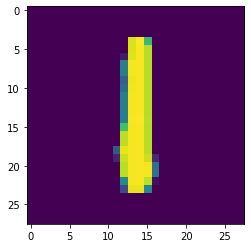

In [10]:
n=random.randint(0,9999) #randomly selects an index n from 0 to 9999 (inclusive
plt.imshow(x_test[n]) # shows the image at index n in the x_test array
plt.show()

313/313 [==============================] - 2s 5ms/step


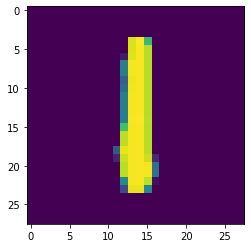

[9.6846406e-08 9.9630213e-01 3.4483772e-04 1.9842651e-04 4.5580264e-06
 6.7909896e-05 6.3149026e-04 7.2726202e-06 2.4384230e-03 4.7323119e-06]


In [11]:
predicted_value=model.predict(x_test)
# predicts the class of the image at index n in 
# the test dataset using the trained model


plt.imshow(x_test[n]) # shows the image at index n in the x_test array,
plt.show()

print(predicted_value[n])

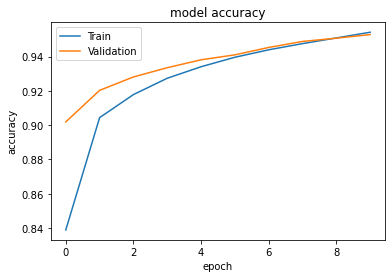

In [12]:
# history.history()
history.history.keys()
# dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

# Plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

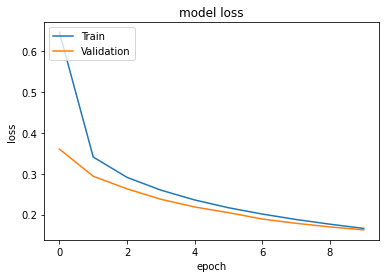

In [13]:
# Plot training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()